C:\Users\MOHD ISHTIYAQ AHMED\Downloads\Apps\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\MOHD ISHTIYAQ AHMED\Downloads\Apps\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\MOHD ISHTIYAQ AHMED\Downloads\Apps\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\MOHD ISHTIYAQ AHMED\Downloads\Apps\Anaconda\lib\site-packages\panda

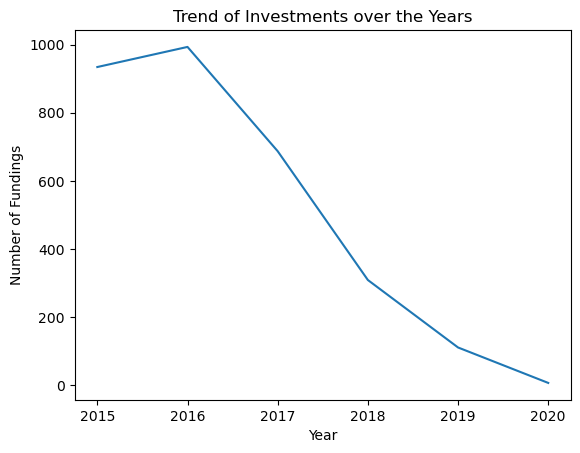

2015.0 934
2016.0 993
2017.0 687
2018.0 309
2019.0 111
2020.0 7


In [69]:
#Check the trend of investments over the years. To check the trend
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:\\Users\\MOHD ISHTIYAQ AHMED\\Desktop\\Adnan\\Project\\funding india startup\\startup_funding.csv")

df['Date'] = df['Date'].str.replace('\xc2\xa0', ' ')
df['Date'] = df['Date'].str.replace('//', '/')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year'] = df['Date'].dt.year.dropna().astype(int)

year_fundings = df['Year'].value_counts().sort_index()

plt.plot(year_fundings.index, year_fundings.values)
plt.xlabel('Year')
plt.ylabel('Number of Fundings')
plt.title('Trend of Investments over the Years')
plt.show()

for year, count in year_fundings.items():
    print(year, count)


Bangalore 848
Mumbai 572
New Delhi 459
Gurgaon 288
 180
Pune 112
Hyderabad 100
Chennai 98
Noida 93
Gurugram 50


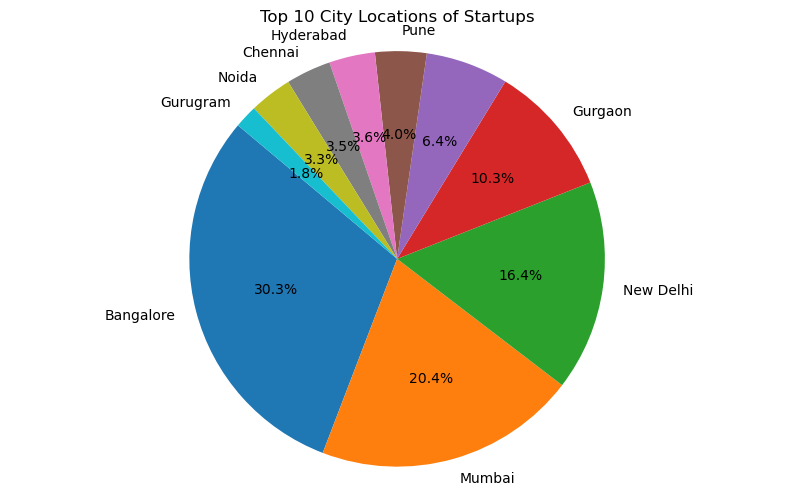

In [56]:
#Finding top 10 Indian cities which have most number of startups ?
#Ploting a pie chart and visualise it
df['CityLocation'].dropna(inplace=True)
def separateCity(city):
    if isinstance(city, str):  
        return city.split('/')[0].strip()
    return ''
df['CityLocation']=df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)
df['CityLocation'].replace("Bengaluru","Bangalore",inplace=True)
city_number=df['CityLocation'].value_counts()[0:10]
city=city_number.index
numCity=city_number.values
for i in range(len(city)):
    print(city[i],numCity[i])
plt.figure(figsize=(10, 6))
plt.pie(city_number, labels=city_number.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title("Top 10 City Locations of Startups")
plt.show()

In [57]:
#Find out if cities play any role in receiving funding.
## Converting  "AmountInUSD" into numeric format
df["AmountInUSD"] = df["AmountInUSD"].apply(lambda x: float(str(x).replace(",", "")) if str(x).replace(",", "").replace(".", "").isnumeric() else np.nan)
df["AmountInUSD"] = pd.to_numeric(df["AmountInUSD"])

# Drop rows with non-numeric 'AmountInUSD' values
df = df.dropna(subset=["AmountInUSD"])

# Calculate total funding amounts for each city
city_amount = df.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]

# Extract city names and funding amounts
city = city_amount.index
amountCity = city_amount.values

# Calculate percentages
total_funding = amountCity.sum()
perAmount = np.true_divide(amountCity, total_funding) * 100

# Print city names and percentages
for i in range(len(city)):
    print(f"{city[i]}: {amountCity[i]:,.2f} USD ({perAmount[i]:.2f}%)")

Bangalore: 18,499,366,863.00 USD (52.72%)
Mumbai: 4,939,225,015.00 USD (14.08%)
New Delhi: 3,358,571,515.00 USD (9.57%)
Gurgaon: 3,006,496,134.54 USD (8.57%)
: 1,271,863,868.00 USD (3.62%)
Noida: 1,263,164,000.00 USD (3.60%)
Gurugram: 865,932,523.00 USD (2.47%)
Chennai: 718,767,000.00 USD (2.05%)
Pune: 717,582,000.00 USD (2.04%)
Menlo Park: 450,000,000.00 USD (1.28%)


Private Equity 70.04
Series B 12.61
Series D 3.89
Series C 2.75
Funding Round 2.63
Seed Funding 1.49
Private Equity Round 1.33
Series G 0.61
Series A 0.53
Seed Round 0.51


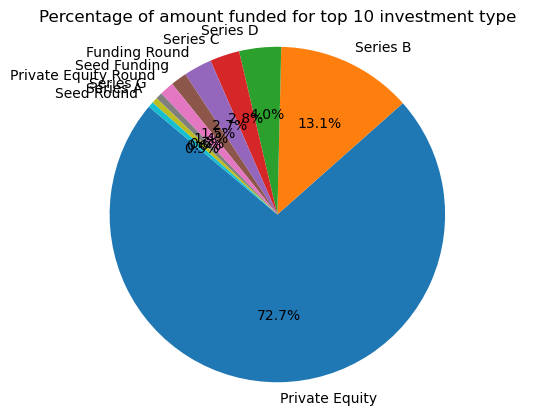

In [58]:
#Finding out percentage of amount funded for each investment type.

# replace any spelling mistakes in the InvestmentType column
df['InvestmentType'] = df['InvestmentType'].replace({
    'PrivateEquity': 'Private Equity',
    'SeedFunding': 'Seed Funding',
    'DebtFunding': 'Debt Funding',
    'Crowd funding': 'Crowd Funding'
})

# drop rows with missing values in the AmountInUSD column
df = df.dropna(subset=['AmountInUSD'])

# calculate the total amount funded
total_funding = df['AmountInUSD'].sum()

# calculate the amount and percentage of funding for each investment type
investment_count = df.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)[:10]
investment_percentage = 100 * investment_count / total_funding

# print the results
for i in range(len(investment_count)):
    print(investment_count.index[i], format(investment_percentage[i], '.2f'))

# plot the pie chart
plt.pie(investment_count, labels=investment_count.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of amount funded for top 10 investment type')
plt.show()

In [66]:
#Finding top 5 startups with most amount of total funding..
df['StartupName'].replace({'Ola Cabs': 'Ola', 'Flipkart.com': 'Flipkart', 'Oyo Rooms': 'Oyo', 'Paytm Marketplace': 'Paytm'}, inplace=True)

startup_funding = df.groupby('StartupName')['AmountInUSD'].sum().reset_index()

startup_funding = startup_funding.sort_values(by='AmountInUSD', ascending=False)

top_startups = startup_funding.head(5)

# print top 5 startups
for i, row in top_startups.iterrows():
    print(i,row['StartupName'])


484 Flipkart
1144 Rapido Bike Taxi
1045 Paytm
1003 Ola
1460 Udaan


In [68]:
#Finding the top 5 startups who received the most number of funding rounds.

df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
start_round=df['StartupName'].value_counts()[0:5]
startup=start_round.index
fundround=start_round.values
for i in range(len(startup)):
    print(startup[i],fundround[i])

Ola 12
Oyo 9
Swiggy 8
Paytm 6
Flipkart 6


In [70]:
#Finding the Investors who have invested maximum number of times.

df.InvestorsName.replace('Undisclosed Investors', 'Not Available', inplace=True)

df = df[['InvestorsName']]
df.dropna(inplace=True)

# Split the InvestorsName column by comma and count the number of investments per investor
investor_count = df.InvestorsName.str.split(',', expand=True).stack().str.strip().value_counts()

for i, (investor, count) in enumerate(investor_count.iteritems()):
    if investor == 'Not Available':
        continue
    print(investor, count)
    break

Sequoia Capital 72
